In [17]:
import numpy as np
from patchmatch import PatchMatch
import cv2
from helper_functions import *
import mahotas
from copy import deepcopy

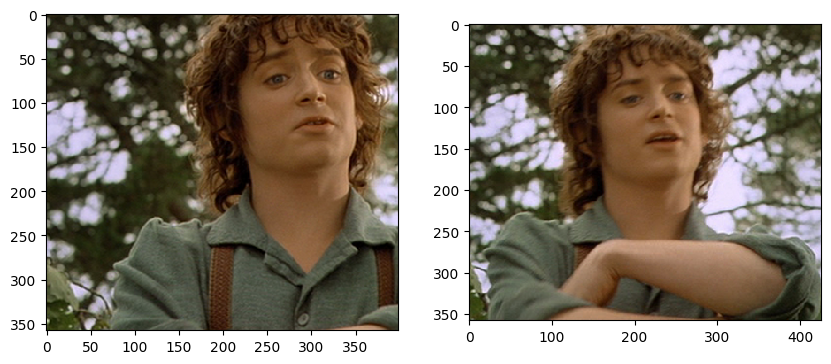

(358, 399, 3) (358, 426, 3)


In [2]:
pm = PatchMatch(2,3)
a = read_image("../images/a.png")
a_cpy = deepcopy(a)
b = read_image("../images/b.png")
b_cpy = deepcopy(b)
a = mahotas.colors.rgb2lab(a)
b = mahotas.colors.rgb2lab(b)
plot_images([a_cpy,b_cpy], (1,2))
print(a.shape, b.shape)

In [3]:
dist, loc = pm.run(a,b, True)

100%|██████████| 2/2 [00:38<00:00, 19.23s/it]


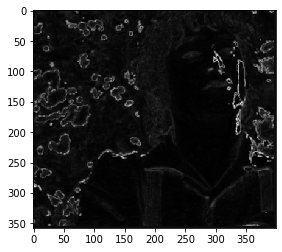

In [4]:
plt.imshow(dist, 'gray'); plt.show()

(358, 399, 3)


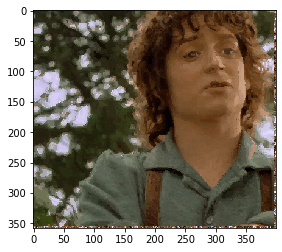

In [5]:
print(a.shape)
reconstructted_image = np.zeros(a_cpy.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = b_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.show()

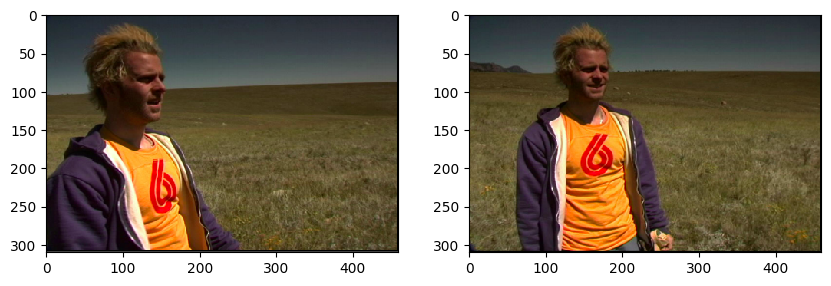

In [6]:
a = read_image("../images/test1a.png")
b = read_image("../images/test1b.png")
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [7]:
dist, loc = pm.run(b,a, True)

100%|██████████| 2/2 [00:38<00:00, 19.23s/it]


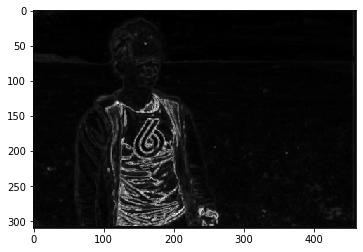

(310, 460, 3)


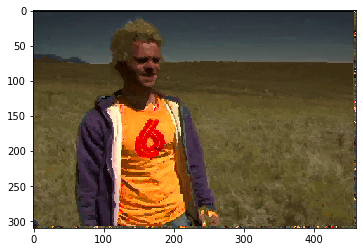

In [8]:
plt.imshow(dist, 'gray'); plt.show()
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.show()

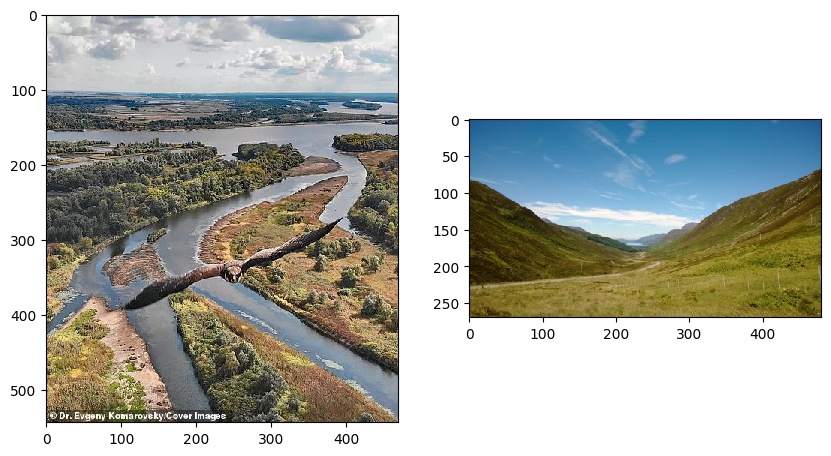

In [9]:
a = read_image("../images/test3a.jpg")
b = read_image("../images/test3b.jpg")
plot_images([a,b], (1,2))
a_cpy = deepcopy(a)
b_cpy = deepcopy(b)
a = mahotas.colors.rgb2lab(a)
b = mahotas.colors.rgb2lab(b)

In [10]:
dist, loc = pm.run(b,a, True)

100%|██████████| 2/2 [00:39<00:00, 19.57s/it]


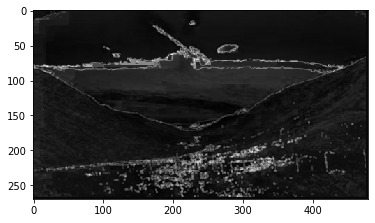

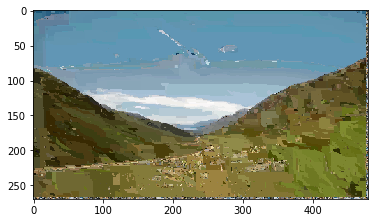

In [11]:
plt.imshow(dist, 'gray'); plt.show()
# print(a.shape)
reconstructted_image = np.zeros(b.shape)
for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        reconstructted_image[i,j,1] = a_cpy[loc[i,j,0],loc[i,j,1],1]
        reconstructted_image[i,j,2] = a_cpy[loc[i,j,0],loc[i,j,1],2]
        reconstructted_image[i,j,0] = a_cpy[loc[i,j,0],loc[i,j,1],0]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.show()

## Tests on specific datasets
- Middlebury Stereo Vision dataset
- Images extracted from successive frames in a video
- Caltech -256
- Own images

### Middlebury stereo vision 

In [54]:
stereo_path = "../../separate-data/middlebury-stereo"

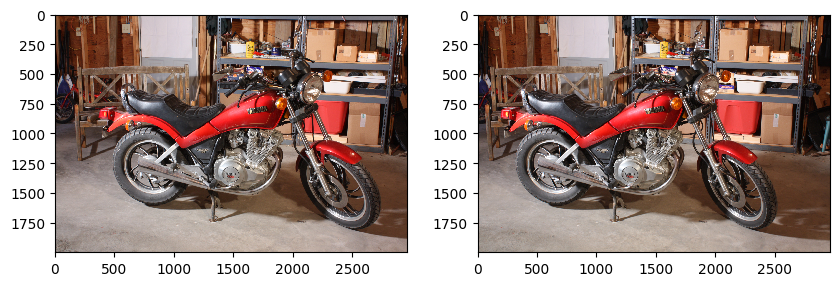

In [55]:
a = read_image(os.path.join(stereo_path, "im0.png"))
b = read_image(os.path.join(stereo_path, "im1.png"))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [57]:
dist, loc = pm.run(b,a, True)

100%|██████████| 2/2 [29:25<00:00, 882.90s/it]


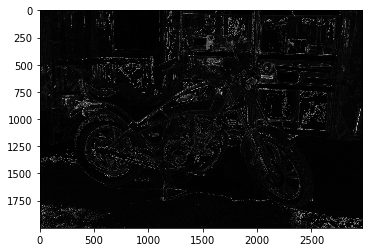

(2000, 2964, 3)


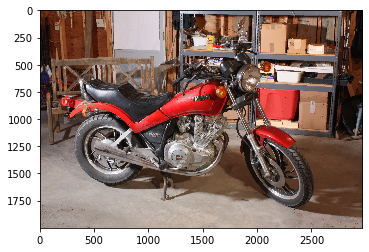

In [58]:
plt.imshow(dist, 'gray'); plt.show()
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.show()

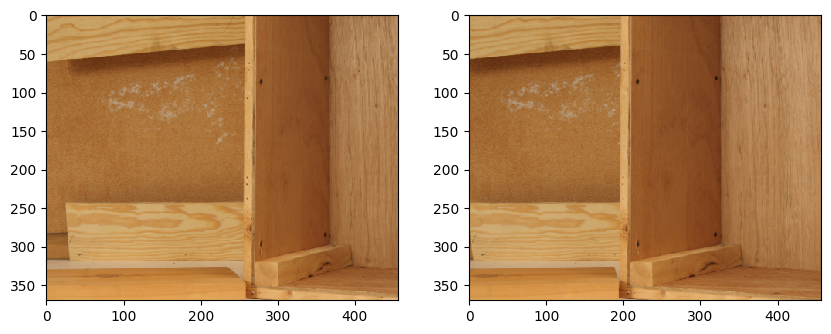

In [60]:
a = read_image(os.path.join(stereo_path, "view1.png"))
b = read_image(os.path.join(stereo_path, "view5.png"))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [61]:
dist, loc = pm.run(b,a, True)

100%|██████████| 2/2 [00:46<00:00, 23.44s/it]


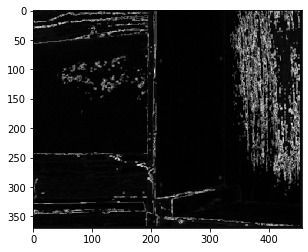

(370, 457, 3)


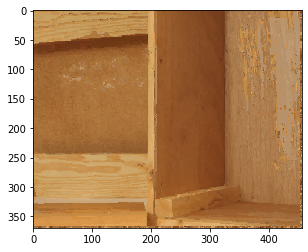

In [62]:
plt.imshow(dist, 'gray'); plt.show()
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.show()

### Test on successive frames in a video

In [42]:
def get_frames_vid(inp_path, out_path, name_prefix = "frame_",num_images = 80):
    cap = cv2.VideoCapture(inp_path)
    ret, frame = cap.read()
    num_images_count = 0
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # cv2.imwrite(os.path.join(out_path, name_prefix + str(num_images_count)), img)
    plt.imsave(os.path.join(out_path, name_prefix + str(num_images_count) + ".png"), img)
    while(1):
        num_images_count = num_images_count + 1
        if num_images_count == num_images:
            break
        ret, frame2 = cap.read()
        if ret is False:
            break
        img_next = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
        # cv2.imwrite(os.path.join(out_path, name_prefix + str(num_images_count)), img_next)
        plt.imsave(os.path.join(out_path, name_prefix + str(num_images_count)+".png"), img_next)

In [43]:
video_path = "../../separate-data/running.mp4"
frame_path = "../../separate-data/video-frames/"

In [44]:
# get_frames_vid(video_path, frame_path)

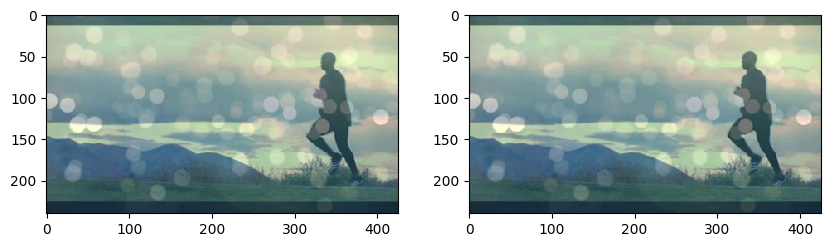

In [45]:
a = read_image(os.path.join(frame_path, "frame_76.png"))
b = read_image(os.path.join(frame_path, "frame_77.png"))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [46]:
dist, loc = pm.run(b,a, True)

100%|██████████| 2/2 [00:27<00:00, 13.60s/it]


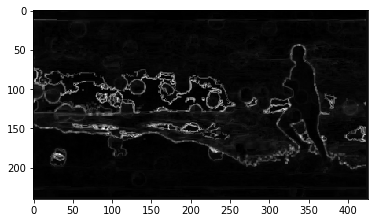

(240, 426, 3)


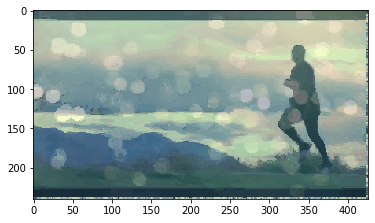

In [47]:
plt.imshow(dist, 'gray'); plt.show()
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.show()

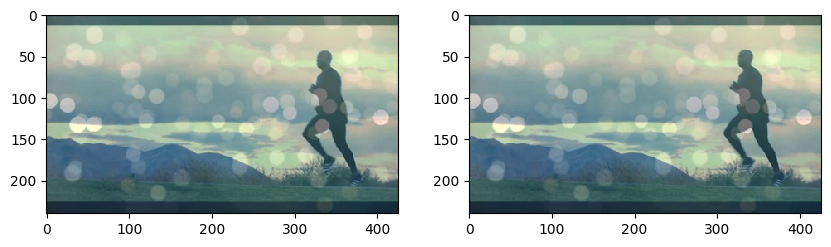

In [48]:
a = read_image(os.path.join(frame_path, "frame_78.png"))
b = read_image(os.path.join(frame_path, "frame_79.png"))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [49]:
dist, loc = pm.run(b,a, True)

100%|██████████| 2/2 [00:28<00:00, 14.24s/it]


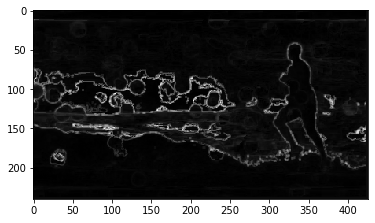

(240, 426, 3)


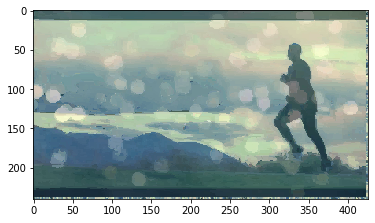

In [50]:
plt.imshow(dist, 'gray'); plt.show()
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.show()

### Caltech-256

In [63]:
caltech_path = "../../separate-data/caltech-256"

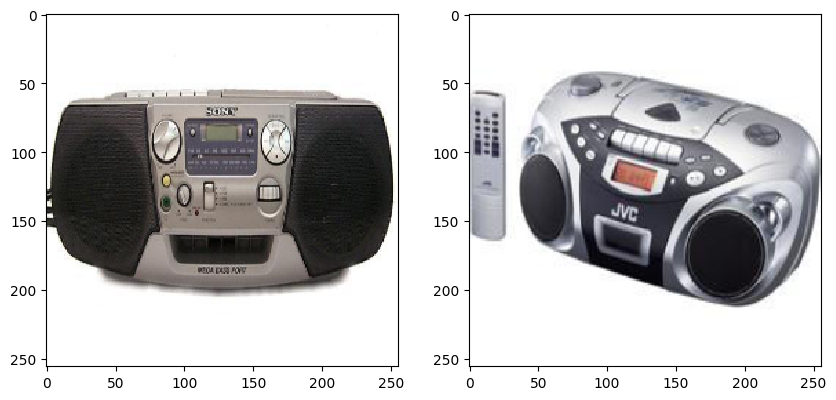

In [74]:
a = read_image(os.path.join(caltech_path, "boom1.jpg"))
b = read_image(os.path.join(caltech_path, "boom2.jpg"))
a = cv2.resize(a, (256, 256))
b = cv2.resize(b, (256, 256))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [75]:
dist, loc = pm.run(b,a, True)

100%|██████████| 2/2 [00:18<00:00,  9.07s/it]


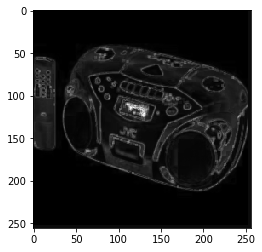

(256, 256, 3)


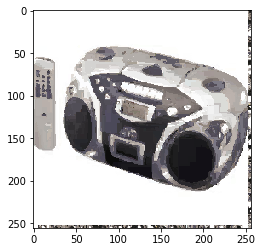

In [76]:
plt.imshow(dist, 'gray'); plt.show()
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.show()

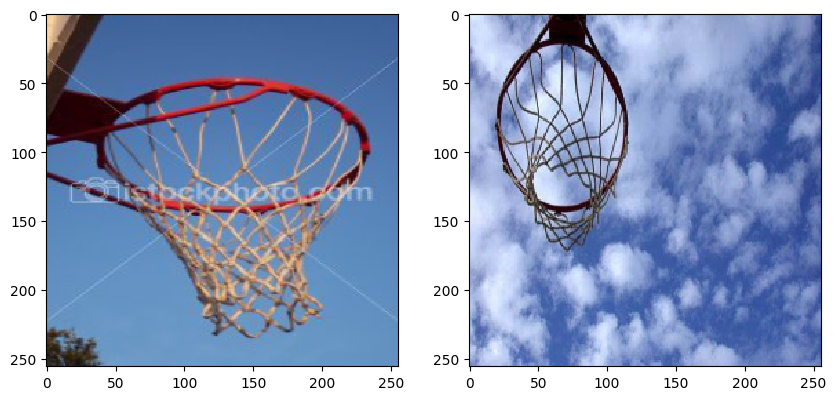

In [71]:
a = read_image(os.path.join(caltech_path, "hoop1.jpg"))
b = read_image(os.path.join(caltech_path, "hoop2.jpg"))
a = cv2.resize(a, (256, 256))
b = cv2.resize(b, (256, 256))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [72]:
dist, loc = pm.run(b,a, True)

100%|██████████| 2/2 [00:18<00:00,  9.03s/it]


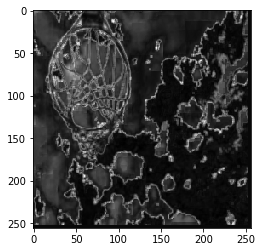

(256, 256, 3)


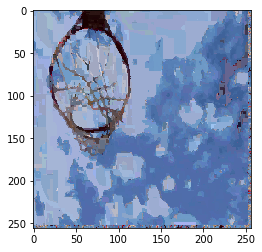

In [73]:
plt.imshow(dist, 'gray'); plt.show()
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.show()

### Own images

In [78]:
ajay_path = "../../separate-data/ajay-images/"

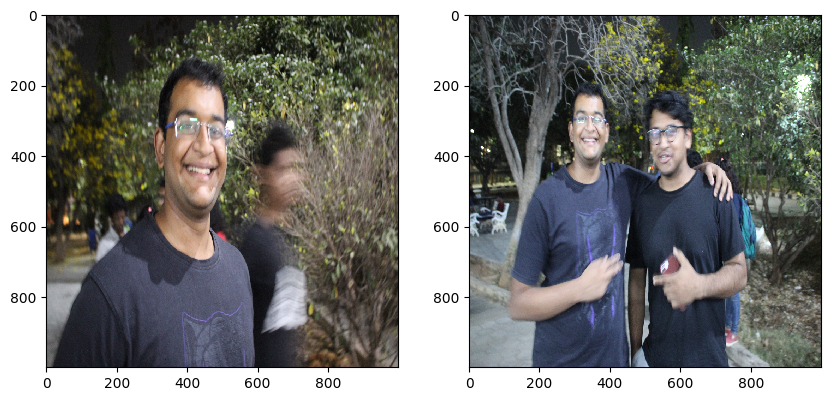

In [83]:
a = read_image(os.path.join(ajay_path, "ajay1.JPG"))
b = read_image(os.path.join(ajay_path, "ajay2.JPG"))
a = cv2.resize(a, (1000, 1000))
b = cv2.resize(b, (1000, 1000))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [84]:
dist, loc = pm.run(b,a, True)

100%|██████████| 2/2 [05:00<00:00, 150.15s/it]
